In [1]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skl
sns.set()

In [3]:
df = pd.read_csv('/content/Algerian_forest_fires_dataset_UPDATE.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [4]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(243, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4    RH          243 non-null    int64  
 5    Ws          243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    object 
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 28.5+ KB


In [9]:
df.columns = [x.strip() for x in df.columns]

In [10]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [11]:
#Adding new column based on Bejaia Region(1) and Sidi Bel-abbes Region(0) differentiation

df['Region'] = 1
for i in range(len(df)):
  if i >= 122:
    df['Region'][i] = 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,0
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,0
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,0
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,0


In [13]:
#Shuffling the rows 
df = df.sample(frac=1).reset_index(drop=True)



In [14]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,23,7,2012,27,66,22,0.4,68.2,10.5,71.3,1.8,15.4,2.1,not fire,1
1,6,8,2012,30,54,14,3.1,70.5,11.0,9.1,1.3,10.5,0.8,not fire,0
2,10,7,2012,33,69,13,0.7,66.6,6.0,9.3,1.1,5.8,0.5,not fire,1
3,15,7,2012,30,80,19,0.4,60.7,5.2,17,1.1,5.9,0.5,not fire,1
4,22,6,2012,33,46,14,1.1,78.3,8.1,8.3,1.9,7.7,1.2,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,2,8,2012,40,34,14,0.0,93.3,10.8,21.4,13.8,10.6,13.5,fire,0
239,14,6,2012,27,79,16,0.7,53.4,6.4,7.3,0.5,6.1,0.3,not fire,0
240,13,7,2012,34,81,15,0.0,81.8,9.7,37.2,3.0,11.7,3.4,not fire,1
241,28,8,2012,35,56,14,0.4,79.2,37.0,166,2.1,30.6,6.1,not fire,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    object 
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 28.6+ KB


In [16]:

#Categorical features 
cat_features=[feature for feature in df.columns if df[feature].dtypes=='object']
print("Categorical features:", cat_features, len(cat_features))
#Numerical Features 
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
print("Numerical features: ", numerical_features, len(numerical_features))
### numerical variables- 2 Types
##1. Continuous variable and Discrete variable


###Discrete variables 
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<=25]
print("Discrete features: ", discrete_feature, len(discrete_feature))

###Continuous Variables 
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous features:", continuous_feature, len(continuous_feature))

Categorical features: ['DC', 'FWI', 'Classes'] 3
Numerical features:  ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI', 'Region'] 12
Discrete features:  ['month', 'year', 'Temperature', 'Ws', 'Region'] 5
Continuous features: ['day', 'RH', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI'] 7


In [17]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'not fire ', 'not fire', 'fire ',
       'not fire    ', 'not fire     '], dtype=object)

In [18]:
df['Classes'] = df['Classes'].str.strip()
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [19]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,4.742387,16.690535,0.506173
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,4.154234,14.228421,0.500994
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,1.400000,6.000000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,3.500000,12.400000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,7.250000,22.650000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000,1.000000


In [20]:
#As we see above that all the features are numeric but some of them are under object category so we have to convert them to int type

In [21]:
cat_features

['DC', 'FWI', 'Classes']

In [22]:
df["DC"] = pd.to_numeric(df["DC"])
df["FWI"] = pd.to_numeric(df["FWI"])
print(df["DC"].dtype)
print(df["FWI"].dtype)



float64
float64


In [23]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [24]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.506173
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.500994
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [25]:
df['DC'].unique()

array([ 71.3,   9.1,   9.3,  17. ,   8.3,   6.9,  27.1,  19.4,  26.6,
        79.9,  54.3,  28.9, 108.5,  63.3, 149.2, 110.9,   8.8,  61.4,
         9.8,  26.1,  16.6,  27.7,  41.5,   7.7,  84.4,  32.1,  79.7,
        54.2,   8.4,  57.9, 167.2,  46.3,  10.5,  15.7, 181.3, 137.7,
         9.5,   7.3,   9.2,   7.5,  67. ,   7.6,  37.8,  28.3,   8.9,
        35.4,  17.6,  24. ,  88. ,  94.7,  16.3,  25.2,  18.7,  15.4,
        43.3,  57. ,  75.1,  30.1,  98.6,  36.7,  10. ,  42.3,  22.5,
        38.3,   8. ,  90.4,  52.8,  63.8,  48.6,   8.6,  19.7,  65.1,
        24.9,   7. ,  88.5, 180.4,   9.9,  15.9,  33.4,   7.9,  85.1,
        49.8,  18.5, 200.2, 100.7, 106.3,   7.4,  26.3,  61.1,  15.2,
       127. ,  76.4,  49.3,  80.6,  42.7, 136. ,  71. ,  86. ,  80.3,
       210.4,  52.4,  43.1, 159.1,  39.1,  32.2,  67.2,  16. , 120.9,
        92.5,  96.8,  16.5,  50.2,  14.7,  97.3,  24.1,  59.2,  36.8,
       115.6, 141.1,  20.2, 117.1, 177.3,  37. ,  47.2,   8.7,   7.8,
        45.1,  14.2,

In [26]:
df['FWI'].unique()

array([ 2.1,  0.8,  0.5,  1.2,  0. ,  0.4,  9.6,  0.7,  2.8,  5.6,  6. ,
       15.3, 17.5,  5.9, 16.1,  0.9,  7.1,  0.6,  2.7, 18.8,  0.1,  3.9,
       19.5,  1.3,  5.5,  8.3, 30.3, 21.6, 20.3, 24.5, 11.6,  0.2, 12.9,
        3.2,  0.3,  5.2,  1.7,  3.8, 10.6,  2.2,  1. ,  5.7, 12. ,  9.9,
        4.2,  7.2,  7.7, 10. , 10.9,  8.4,  8. , 14.8,  4.1, 13.9,  3.1,
       10.3, 10.2, 13.2, 14.6, 13.7, 13. , 11.9, 24. ,  6.3, 30. , 20.9,
       10.7, 17.3, 15. , 19.9, 18.4, 16. ,  6.8, 14.5,  1.4, 17.2,  9.8,
        1.9, 14.1, 19.3, 15.2, 12.2, 26.1, 10.5,  4.9,  3. ,  6.7,  2.3,
        4. , 26.3, 25.4,  4.7, 11.3, 16.7,  9.7,  9. ,  7.3, 12.7, 15.4,
       18.1,  2.5,  6.5, 15.7, 22.3,  9.5,  5.3, 26.9, 16.3,  6.1,  7.5,
        2.6,  3.6, 19.4,  8.8, 12.6, 31.1, 12.1, 16.8,  9.1, 20.4,  6.4,
       30.2, 13.5,  3.4,  3.7])

In [27]:
df.isnull().sum().sum()


0

In [28]:
# Statistical summary of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


In [29]:
df['year']

0      2012
1      2012
2      2012
3      2012
4      2012
       ... 
238    2012
239    2012
240    2012
241    2012
242    2012
Name: year, Length: 243, dtype: int64

In [30]:
#Changing dtypes into numerical

df = df.astype({'day':np.object, 'month':np.object, 'year':np.object, 'RH':np.int64, 'Temperature':np.int64, 'Ws':np.int64, 'Rain':np.float64, 'FFMC':np.float64
               ,'DMC':np.float64, 'DC':np.float64, 'ISI':np.float64, 'BUI':np.float64,
               'FWI':np.float64})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,23,7,2012,27,66,22,0.4,68.2,10.5,71.3,1.8,15.4,2.1,not fire,1
1,6,8,2012,30,54,14,3.1,70.5,11.0,9.1,1.3,10.5,0.8,not fire,0
2,10,7,2012,33,69,13,0.7,66.6,6.0,9.3,1.1,5.8,0.5,not fire,1
3,15,7,2012,30,80,19,0.4,60.7,5.2,17.0,1.1,5.9,0.5,not fire,1
4,22,6,2012,33,46,14,1.1,78.3,8.1,8.3,1.9,7.7,1.2,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,2,8,2012,40,34,14,0.0,93.3,10.8,21.4,13.8,10.6,13.5,fire,0
239,14,6,2012,27,79,16,0.7,53.4,6.4,7.3,0.5,6.1,0.3,not fire,0
240,13,7,2012,34,81,15,0.0,81.8,9.7,37.2,3.0,11.7,3.4,not fire,1
241,28,8,2012,35,56,14,0.4,79.2,37.0,166.0,2.1,30.6,6.1,not fire,0


In [32]:
# Printing all the categorical columns
categorical_col = [fea for fea in df.columns if df[fea].dtype == 'O']
print('Categorical columns--',categorical_col)

# Printing all the numerical columns
numerical_col = [fea for fea in df.columns if df[fea].dtype != 'O']
print('Numerical columns--',numerical_col)

Categorical columns-- ['day', 'month', 'year', 'Classes']
Numerical columns-- ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']


Text(0, 0.5, 'ISI')

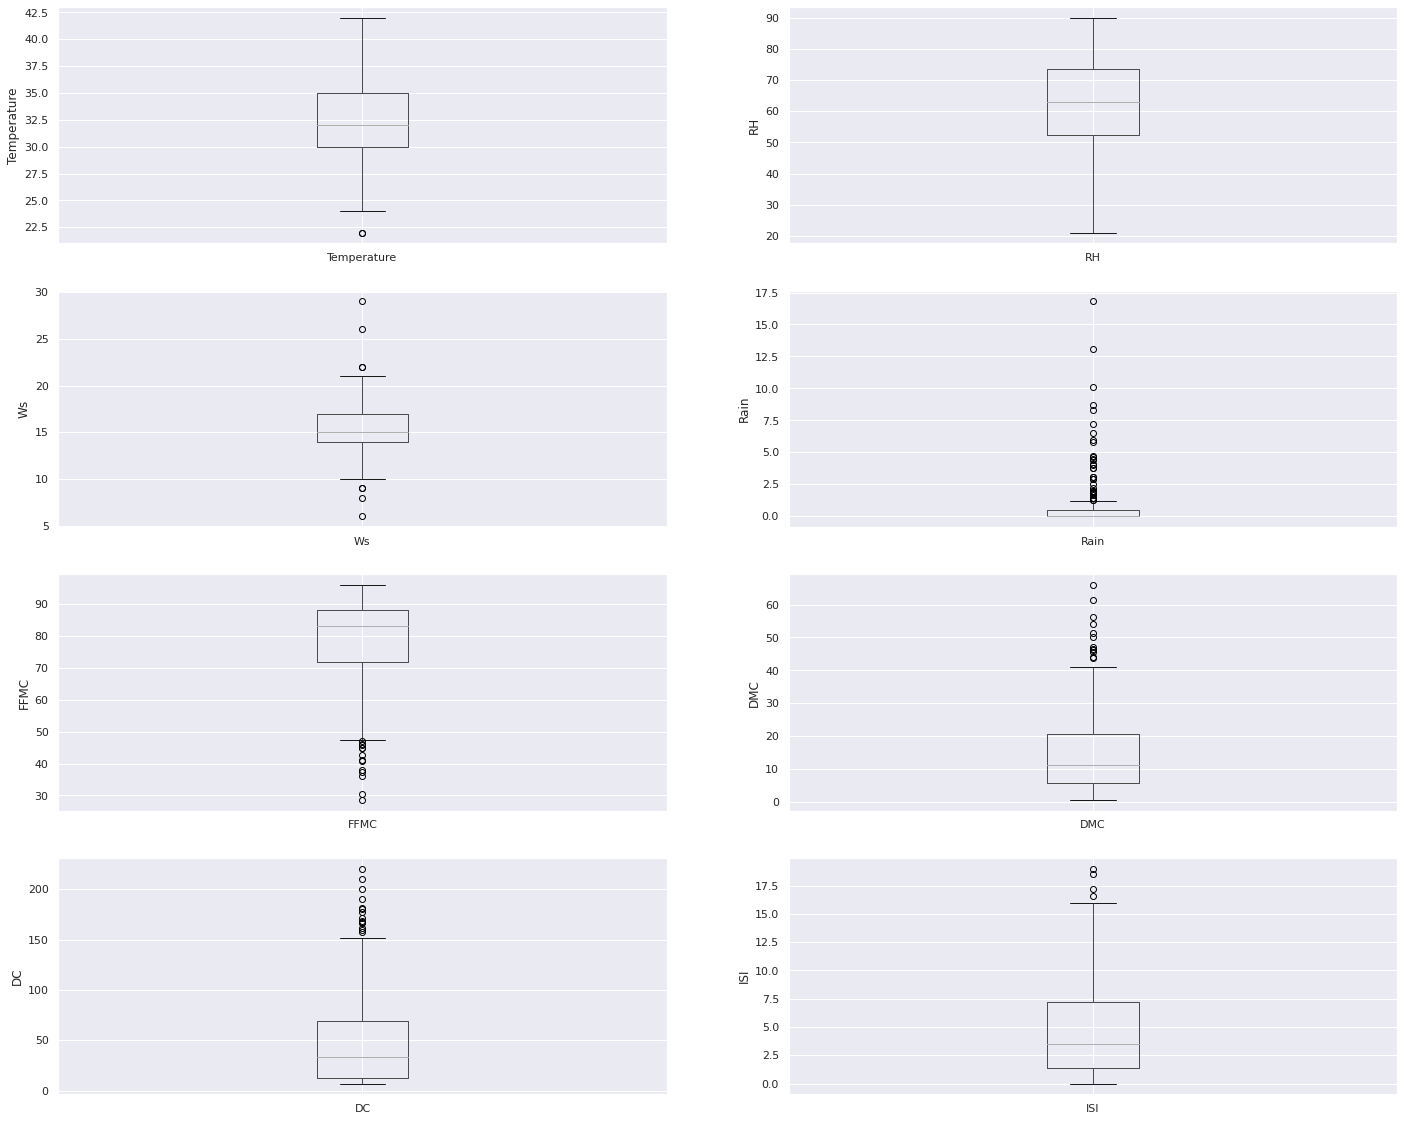

In [33]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='Temperature')
fig.set_title('')
fig.set_ylabel('Temperature')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='RH')
fig.set_title('')
fig.set_ylabel('RH')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='Ws')
fig.set_title('')
fig.set_ylabel('Ws')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='Rain')
fig.set_title('')
fig.set_ylabel('Rain')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='FFMC')
fig.set_title('')
fig.set_ylabel('FFMC')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='DMC')
fig.set_title('')
fig.set_ylabel('DMC')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='DC')
fig.set_title('')
fig.set_ylabel('DC')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='ISI')
fig.set_title('')
fig.set_ylabel('ISI')


Text(0, 0.5, 'Region')

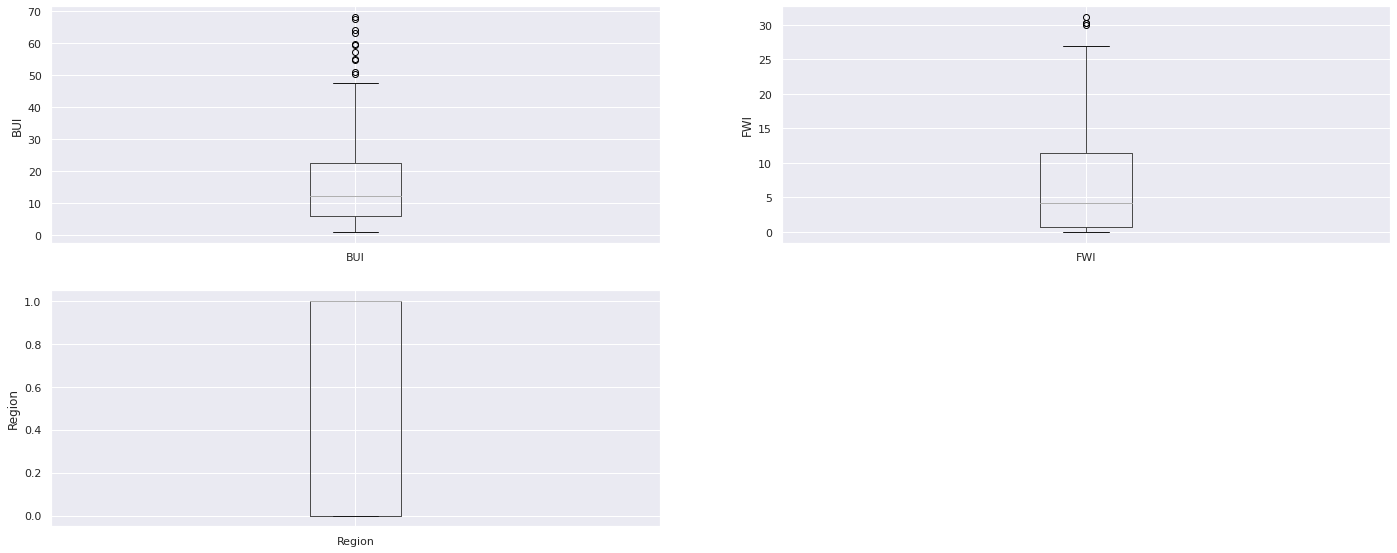

In [34]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='BUI')
fig.set_title('')
fig.set_ylabel('BUI')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='FWI')
fig.set_title('')
fig.set_ylabel('FWI')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='Region')
fig.set_title('')
fig.set_ylabel('Region')

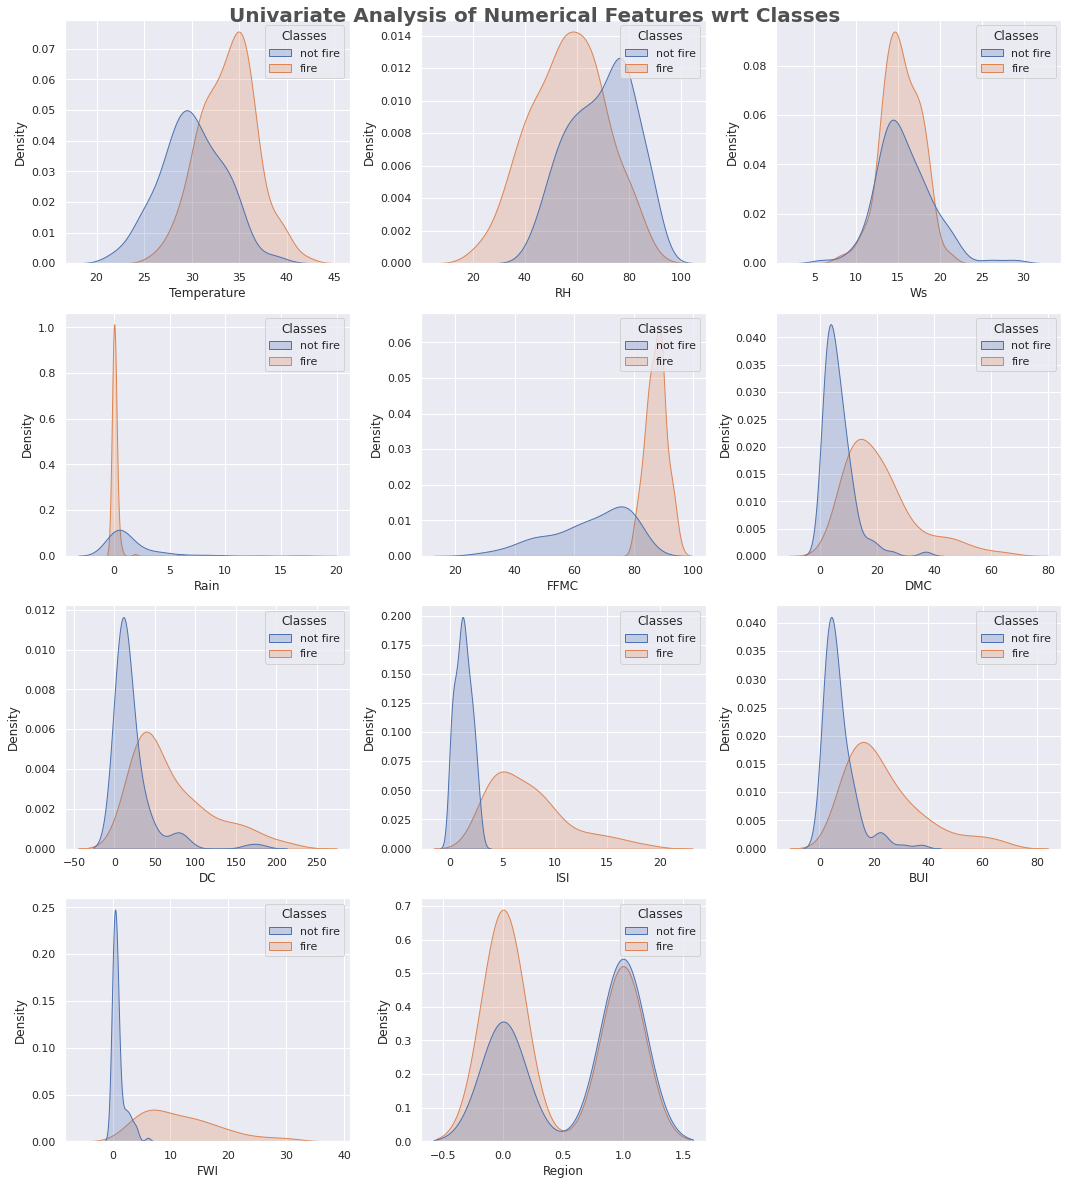

In [35]:
#Distribution of numerical columns (hue=Classes)

plt.figure(figsize=(15, 20))
plt.suptitle('Univariate Analysis of Numerical Features wrt Classes', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_col)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_col[i]],shade=True, color='b',hue='Classes',data=df)
    plt.xlabel(numerical_col[i])
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


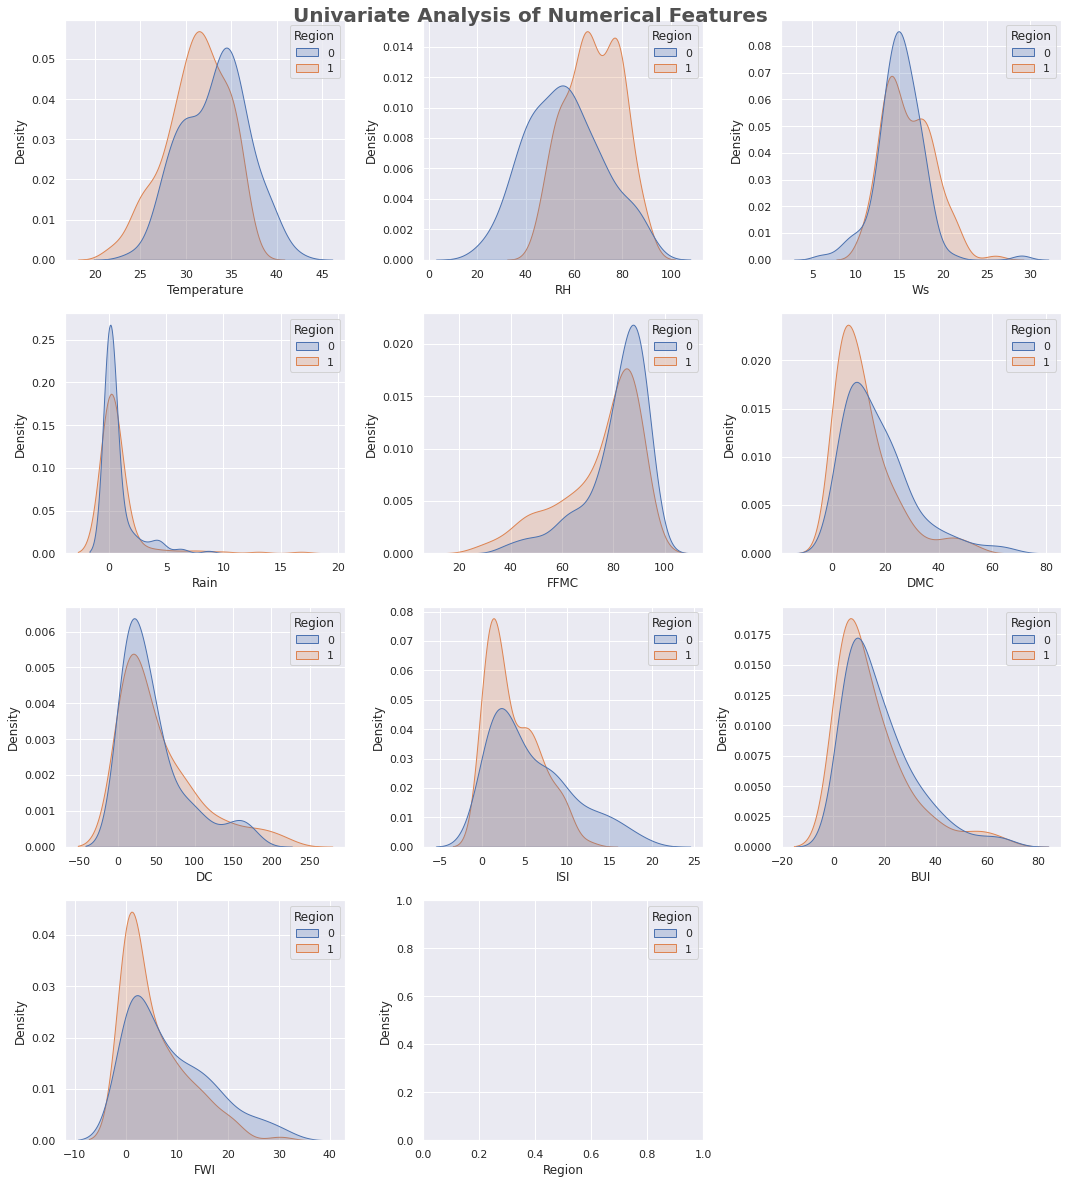

In [36]:
#Distribution of numerical columns (hue=Region)

plt.figure(figsize=(15, 20))
plt.suptitle('Univariate Analysis of Numerical Features ', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_col)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_col[i]],shade=True, color='b',hue='Region',data=df)
    plt.xlabel(numerical_col[i])
    plt.tight_layout()

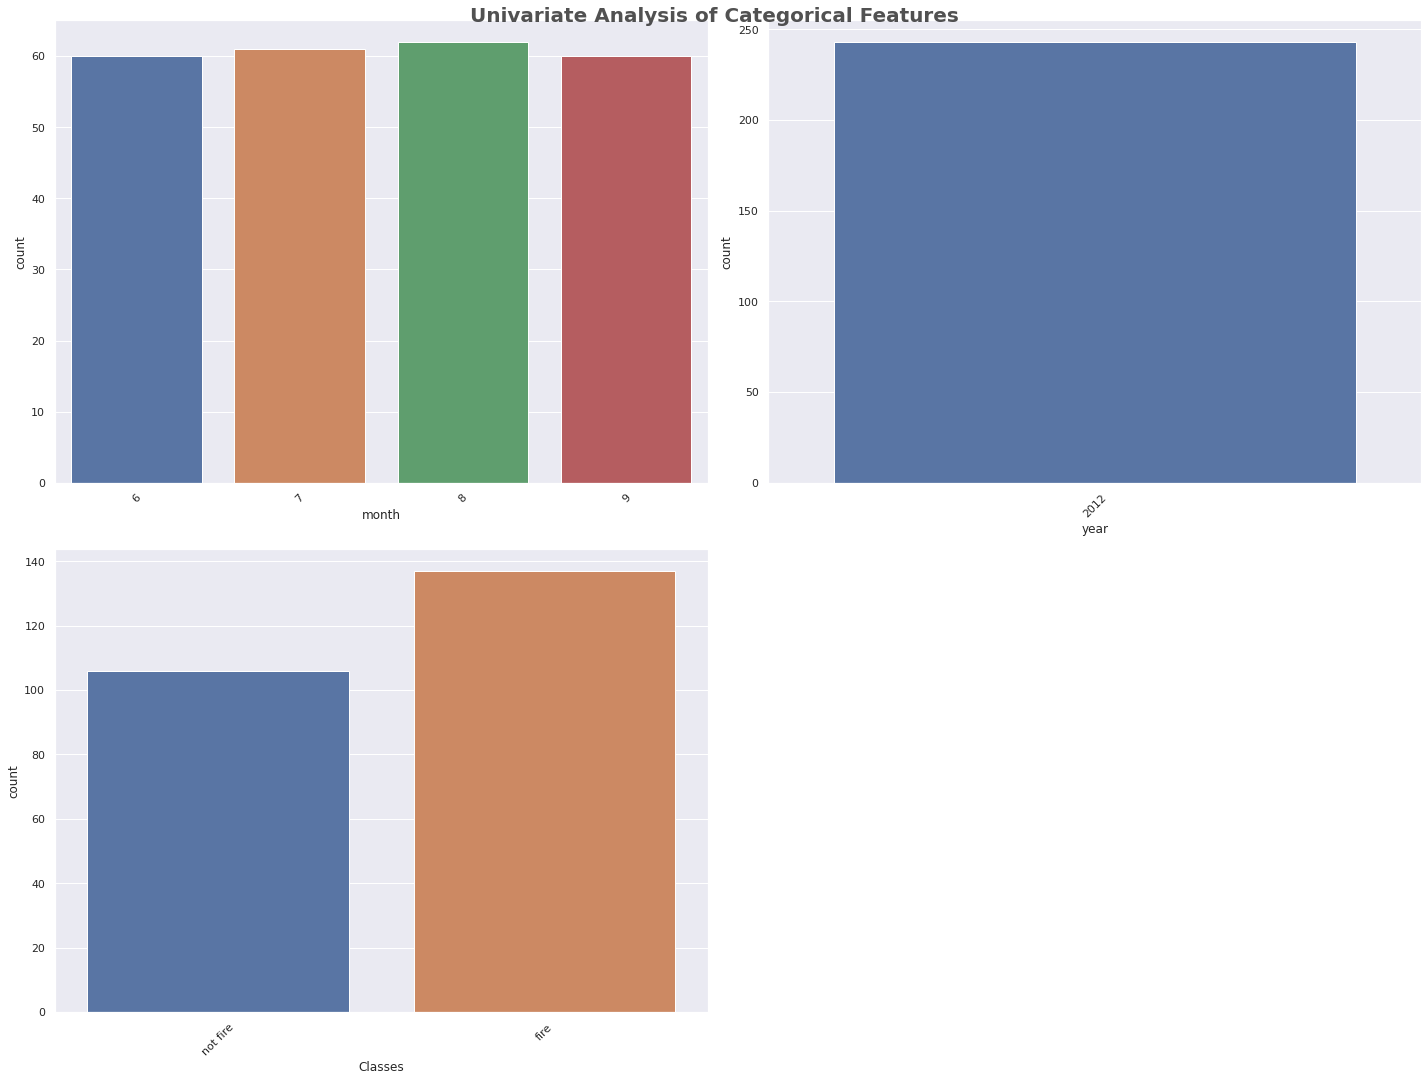

In [37]:
# Distribution of Categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = ['month', 'year', 'Classes']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [38]:
#Checking for Correlation 

df[numerical_col].corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,-0.288107
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,0.403798
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,0.179723
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,0.037697
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,-0.228315
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,-0.199343
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.073041
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,-0.270248
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,-0.096307
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,-0.204360


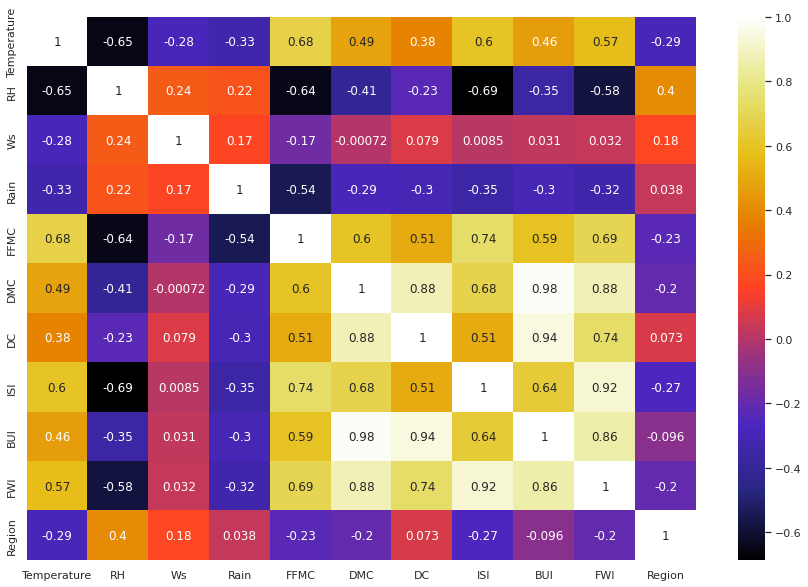

In [39]:
#Heatmap

plt.figure(figsize = (15,10))
sns.heatmap(df[numerical_col].corr(), cmap="CMRmap", annot=True)
plt.show()

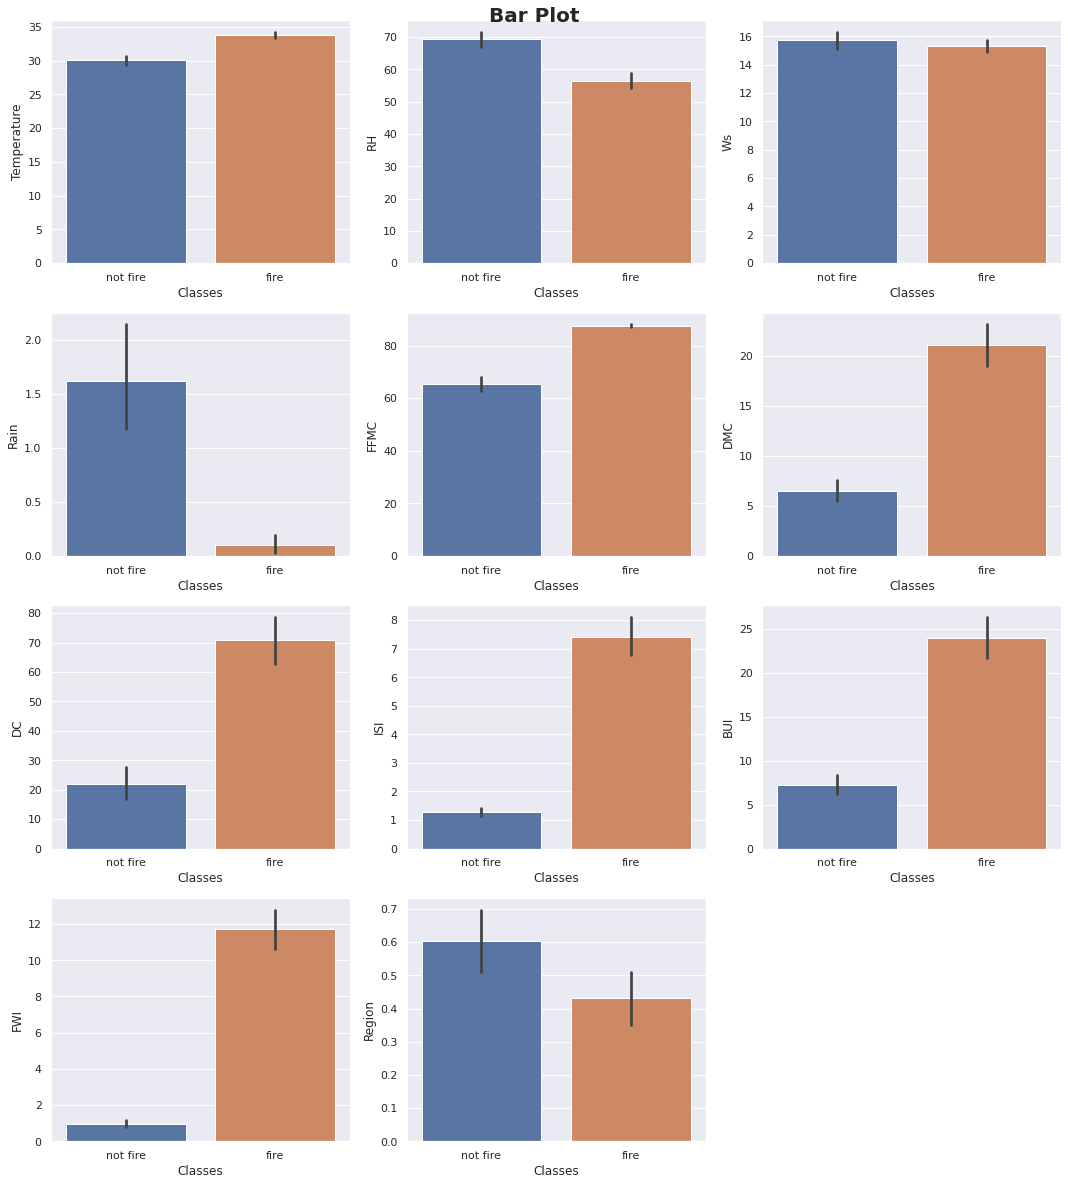

In [40]:
#Plotting relationship between Independent & Target variables 

plt.figure(figsize=(15, 20))
plt.suptitle('Bar Plot', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(numerical_col)):
    plt.subplot(5, 3, i+1)
    sns.barplot(y=numerical_col[i], x='Classes', data=df)
    plt.tight_layout()



# subplot(nrows, ncols, index, **kwargs)
# subplot(pos, **kwargs)
# subplot(**kwargs)
# subplot(ax
             


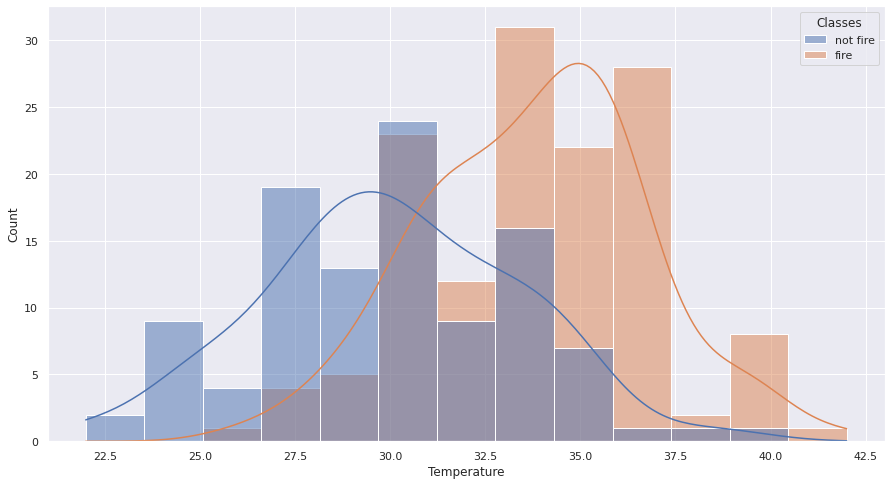

In [41]:
# Plotting Relation between Temperature & Fire 

features = ['Temperature', 'Classes']
temp_df = df[features]
plt.subplots(figsize=(15,8))
sns.histplot(data=temp_df, x=temp_df['Temperature'], hue='Classes', kde=True)

In [42]:
df['Temperature'].describe()

count    243.000000
mean      32.152263
std        3.628039
min       22.000000
25%       30.000000
50%       32.000000
75%       35.000000
max       42.000000
Name: Temperature, dtype: float64

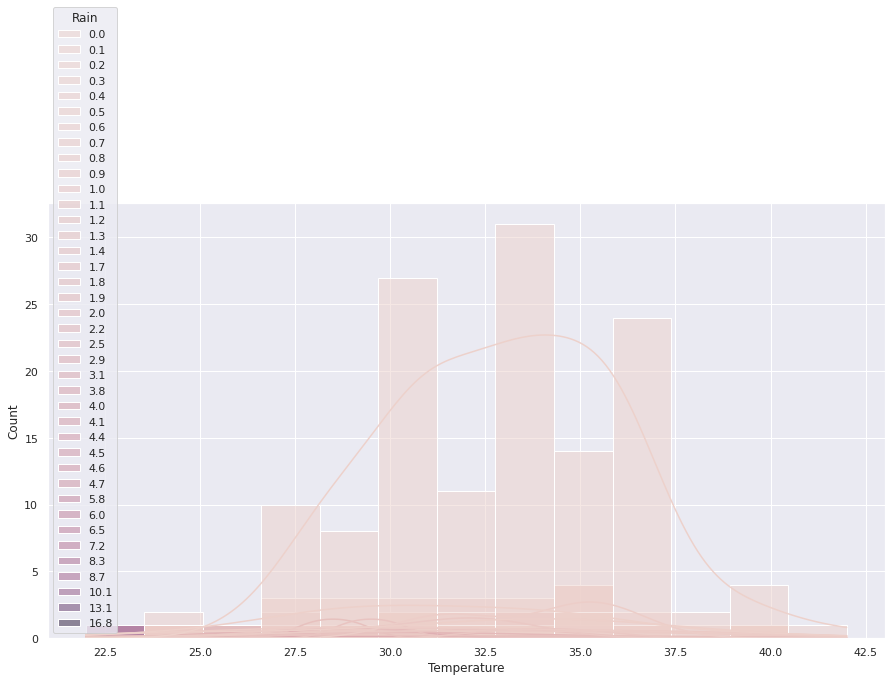

In [43]:
#Plotting relation between Temperature and Rain 
features = ['Temperature', 'Rain']
temp_df = df[features]
plt.subplots(figsize=(15,8))
sns.histplot(data=temp_df, x=temp_df['Temperature'], hue='Rain', kde=True)

In [44]:
#Plotting correlation between Temperature & Rain features 

-0.3264919235683734

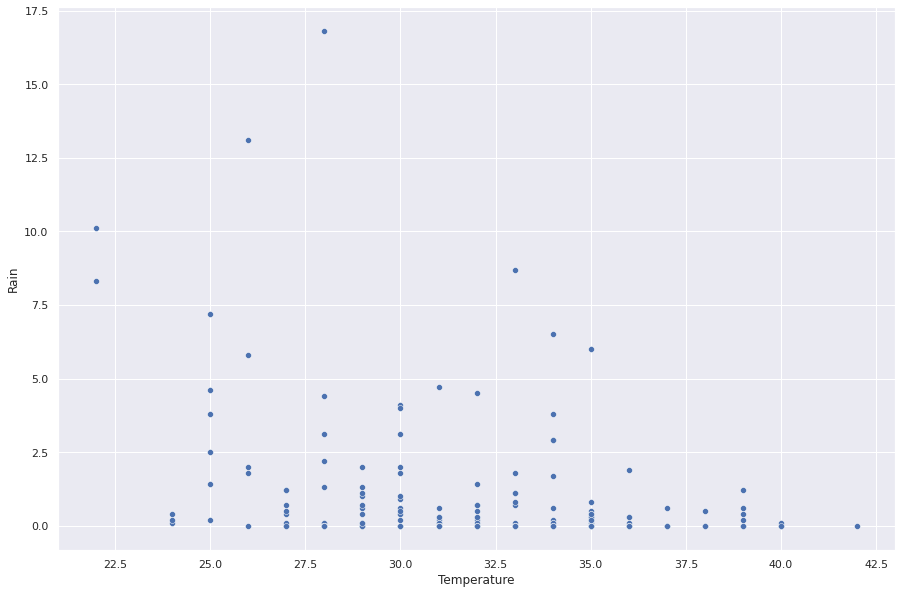

In [45]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['Temperature'], y=df['Rain'], data=df)
df['Temperature'].corr(df['Rain'])

In [46]:
#Train Test Split

In [47]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [48]:
#Taking only Numerical columns 

x = df.iloc[:, 3:13]
y = df['Classes']

In [49]:
x

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,27,66,22,0.4,68.2,10.5,71.3,1.8,15.4,2.1
1,30,54,14,3.1,70.5,11.0,9.1,1.3,10.5,0.8
2,33,69,13,0.7,66.6,6.0,9.3,1.1,5.8,0.5
3,30,80,19,0.4,60.7,5.2,17.0,1.1,5.9,0.5
4,33,46,14,1.1,78.3,8.1,8.3,1.9,7.7,1.2
...,...,...,...,...,...,...,...,...,...,...
238,40,34,14,0.0,93.3,10.8,21.4,13.8,10.6,13.5
239,27,79,16,0.7,53.4,6.4,7.3,0.5,6.1,0.3
240,34,81,15,0.0,81.8,9.7,37.2,3.0,11.7,3.4
241,35,56,14,0.4,79.2,37.0,166.0,2.1,30.6,6.1


In [50]:
y

0      not fire
1      not fire
2      not fire
3      not fire
4      not fire
         ...   
238        fire
239    not fire
240    not fire
241    not fire
242        fire
Name: Classes, Length: 243, dtype: object

In [51]:
#Train-Test Split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=50)

In [52]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(170, 10) (73, 10)
(170,) (73,)


In [53]:
#We will perform Classification algorithms 

# 1. Logistic Regression 

In [90]:
log = LogisticRegression()

log.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [91]:
log.coef_

array([[ 0.35529901,  0.04113031,  0.21915935, -0.55632177, -0.12411708,
         0.36737848, -0.02698576, -1.49358139,  0.04147837, -1.97954725]])

In [92]:
log.intercept_

array([0.1377309])

In [93]:
y_pred = log.predict(x_test)

dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [94]:
dataset

,Actual,Predicted
97,not fire,not fire
16,not fire,not fire
239,not fire,not fire
20,not fire,not fire
215,not fire,not fire
...,...,...
220,not fire,not fire
41,not fire,not fire
98,fire,fire
184,not fire,not fire


In [95]:
#Performance Matrix Calculation 

#Metrices to measure accuracy percentages and error levels: Confusion Matrix, Classification Report, ROC Curve, Accuracy Score

In [96]:
#Confusion Matrix

c_mat = confusion_matrix(y_test, y_pred)
c_mat

#39 TP, 2 FN, 2FP, 30 TN 

array([[39,  1],
       [ 0, 33]])

In [97]:
# Accuracy Score (TP + TN / TP+TN+FP+FN)

acc = accuracy_score(y_test, y_pred)
print(acc)

0.9863013698630136


In [98]:
tp= c_mat[0][0]
fp = c_mat[0][1]
fn = c_mat[1][0]
tn = c_mat[1][1]

#Precision:To ensure that when the model predicts positive, it is in fact true positive  
#(TPR = TP/(TP+FP))
prec = tp/(tp+fp)
print(prec)

#Recall (TP/(TP+FN))
rec = tp/(tp+fn)
print(rec)

0.975
1.0


In [99]:
#F1 Score : Harmonic mean between Precision and Recall values 

f1_score = 2*(prec*rec)/ (rec+prec)
f1_score

0.9873417721518987

In [101]:
#Saving the model
import pickle
pickle.dump(log, open("saved_log_model.sav", "wb"))

# 2. Naive Bayes Classifier

In [64]:
from sklearn.naive_bayes import GaussianNB

gauss_nb = GaussianNB()
gauss_nb.fit(x_train, y_train)

GaussianNB()

In [65]:
gauss_nb.get_params(deep=True)

{'priors': None, 'var_smoothing': 1e-09}

In [66]:
y_pred = gauss_nb.predict(x_test)

In [67]:
dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dataset

,Actual,Predicted
97,not fire,not fire
16,not fire,not fire
239,not fire,not fire
20,not fire,not fire
215,not fire,not fire
...,...,...
220,not fire,not fire
41,not fire,not fire
98,fire,fire
184,not fire,not fire


In [68]:
y_log_pred = gauss_nb.predict_log_proba(x_test)
y_log_pred

array([[-1.16748540e+01, -8.50505625e-06],
       [-8.87581609e+00, -1.39737315e-04],
       [-5.95236520e+01,  0.00000000e+00],
       [-2.08876996e+01, -8.48373816e-10],
       [-6.05099878e+01,  0.00000000e+00],
       [-1.38891189e+01, -9.29035942e-07],
       [-1.88450144e-09, -2.00896030e+01],
       [-4.29246766e+01,  0.00000000e+00],
       [-1.42264027e+02,  0.00000000e+00],
       [-3.50532708e+01,  0.00000000e+00],
       [ 0.00000000e+00, -2.81861544e+02],
       [ 0.00000000e+00, -5.27215000e+01],
       [-4.97379915e-12, -2.60261683e+01],
       [-5.00143930e+01,  0.00000000e+00],
       [-1.42108547e-14, -3.19286821e+01],
       [-3.55271368e-15, -3.31677309e+01],
       [ 0.00000000e+00, -5.29119328e+02],
       [ 0.00000000e+00, -1.85436081e+02],
       [-9.83465396e-03, -4.62675631e+00],
       [-4.79455409e-09, -1.91557852e+01],
       [-7.73492174e+01,  0.00000000e+00],
       [-5.54243125e-01, -8.54506609e-01],
       [-1.51457270e-04, -8.79528274e+00],
       [ 0.

In [69]:
#Confusion Matrix

gnb_mat = confusion_matrix(y_test, y_pred)
gnb_mat

array([[38,  2],
       [ 2, 31]])

In [70]:
# Accuracy Score (TP + TN / TP+TN+FP+FN)

acc = accuracy_score(y_test, y_pred)
print(acc)

0.9452054794520548


In [71]:
#Precision:To ensure that when the model predicts positive, it is in fact true positive  
#(TPR = TP/(TP+FP))
tp= gnb_mat[0][0]
fp = gnb_mat[0][1]
fn = gnb_mat[1][0]
tn = gnb_mat[1][1]
prec = tp/(tp+fp)
print(prec)

#Recall (TP/(TP+FN))
rec = tp/(tp+fn)
print(rec)

0.95
0.95


In [72]:
#F1 Score : Harmonic mean between Precision and Recall values 

f1_score = 2*(prec*rec)/ (rec+prec)
f1_score

0.9500000000000001

# 3. K Nearest Neighbors Classifier

In [73]:
#K Nearest Neighbor Classifier

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [74]:
 y_pred = knn_model.predict(x_test)

dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dataset

,Actual,Predicted
97,not fire,not fire
16,not fire,not fire
239,not fire,not fire
20,not fire,not fire
215,not fire,not fire
...,...,...
220,not fire,not fire
41,not fire,not fire
98,fire,fire
184,not fire,fire


In [75]:
knn_model.score(x_test, y_pred)

1.0

In [76]:
#Confusion Matrix

knn_mat = confusion_matrix(y_test, y_pred)
knn_mat

#39 TP, 2 FN, 2FP, 30 TN 

array([[39,  1],
       [ 3, 30]])

In [77]:
# Accuracy Score (TP + TN / TP+TN+FP+FN)

acc = accuracy_score(y_test, y_pred)
print(acc)

0.9452054794520548


In [78]:
#Precision:To ensure that when the model predicts positive, it is in fact true positive  
#(TPR = TP/(TP+FP))
tp= knn_mat[0][0]
fp = knn_mat[0][1]
fn = knn_mat[1][0]
tn = knn_mat[1][1]


prec = tp/(tp+fp)
print(prec)

#Recall (TP/(TP+FN))
rec = tp/(tp+fn)
print(rec)

0.975
0.9285714285714286


In [79]:
#F1 Score : Harmonic mean between Precision and Recall values 

f1_score = 2*(prec*rec)/ (rec+prec)
f1_score

0.951219512195122

# 4. Decision Tree Classifier

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
dt_model = DecisionTreeClassifier(random_state=0)

In [82]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [83]:
y_pred = dt_model.predict(x_test)
y_pred

array(['not fire', 'not fire', 'not fire', 'not fire', 'not fire',
       'not fire', 'fire', 'not fire', 'not fire', 'not fire', 'fire',
       'fire', 'not fire', 'not fire', 'fire', 'fire', 'fire', 'fire',
       'fire', 'fire', 'not fire', 'fire', 'not fire', 'fire', 'fire',
       'fire', 'not fire', 'not fire', 'not fire', 'not fire', 'not fire',
       'not fire', 'fire', 'fire', 'not fire', 'fire', 'fire', 'fire',
       'fire', 'fire', 'fire', 'fire', 'fire', 'not fire', 'fire', 'fire',
       'not fire', 'fire', 'fire', 'not fire', 'not fire', 'fire',
       'not fire', 'not fire', 'fire', 'not fire', 'fire', 'fire', 'fire',
       'fire', 'fire', 'not fire', 'fire', 'not fire', 'not fire', 'fire',
       'fire', 'fire', 'not fire', 'not fire', 'fire', 'not fire',
       'not fire'], dtype=object)

In [84]:
dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dataset

,Actual,Predicted
97,not fire,not fire
16,not fire,not fire
239,not fire,not fire
20,not fire,not fire
215,not fire,not fire
...,...,...
220,not fire,not fire
41,not fire,not fire
98,fire,fire
184,not fire,not fire


In [85]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with criterion gini index: 0.9863


In [86]:
#Check for Overfitting and underfitting

print('Training set score: {:.4f}'.format(dt_model.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(dt_model.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.9863


High training score and low test score is over-fitting. Very low training score and low test score is under-fitting. But here both the scores are quite comparable. So there is no sign of overfitting

In [87]:
#Classification Report 

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        fire       1.00      0.97      0.99        40
    not fire       0.97      1.00      0.99        33

    accuracy                           0.99        73
   macro avg       0.99      0.99      0.99        73
weighted avg       0.99      0.99      0.99        73



In [88]:
#Confusion Matrix 

dt_cm = confusion_matrix(y_test, y_pred)
dt_cm


array([[39,  1],
       [ 0, 33]])

In [102]:
#Saving the model
import pickle
pickle.dump(log, open("saved_dt_model.sav", "wb"))

# 5. Support Vector Machine Classifier 

In [89]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(x_train,y_train)


# make predictions on test set
y_pred=svc.predict(x_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9315
